In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from scipy import optimize
import sys

In [2]:
wk = list(np.arange(1,261,1))
demand = pd.read_csv("product_demand_raw.csv", names = ['demand']).to_numpy()
demand.shape
# df

(260, 1)

In [3]:
data = pd.read_csv("product_demand_raw.csv", names = ['demand'])
data['week']=np.arange(1,261,1)
data

,demand,week
0,29030.001,1
1,28930.000,2
2,28830.000,3
3,29020.000,4
4,27000.000,5
...,...,...
255,44509.998,256
256,44400.002,257
257,43060.001,258
258,43369.999,259


In [4]:
time = np.arange(1,261,1)
# print(time)

In [5]:
var = []
for i in range(1,53):
    var.append("e"+str(i))

In [6]:
matrix = np.zeros((260,52))
# test = np.array(([2,5,4],[3,5,7]))
# print(test[0][1])

In [7]:
def add(week,matrix):
    n = week%52
    matrix[week][n] += 1
    return (matrix)

In [8]:
for i in range(260):
    add(i,matrix)
print(matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
df = pd.DataFrame(matrix, columns = var)
df['e0'] = int(1) 
df['t'] = np.arange(1,261)
df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e45,e46,e47,e48,e49,e50,e51,e52,e0,t
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,256
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,257
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,258
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,259


In [10]:
df.columns

Index(['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11',
       'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21',
       'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31',
       'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41',
       'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51',
       'e52', 'e0', 't'],
      dtype='object')

In [11]:
Mat = df.to_numpy()
# Mat.shape

In [12]:
sol,res,rank, s = np.linalg.lstsq(Mat,demand, rcond=None)
Sr = np.linalg.lstsq(Mat,demand, rcond=None)[0]
np.set_printoptions(threshold=sys.maxsize)

In [13]:
coef = []
for i in Sr:
    coef.append(float(i))
print(coef)
print(len(coef))

[2209.274912167096, 909.1112502958364, 1520.9479884247849, 554.7851265532609, 428.62066468194735, 384.4576028106528, 954.2939409392989, 1098.1310790679818, 1549.9682171966995, 571.804755325451, 913.6404934539679, 165.47723158247004, -226.6856302883723, -304.8500921597704, -639.0133540310211, -109.17681590239857, -369.3400777736475, -25.503739644997836, -939.6670015163029, -239.830663387679, -487.9933252589153, -372.15698713026916, 481.67935099853156, 341.51588912716363, 165.35142725592732, -132.81103461531404, -566.9754964866531, -741.1385583578749, -1147.3018202293413, -665.4652821006912, -1505.6277439719613, -1955.7928058433058, -2015.9556677145317, -1560.1177295857033, -672.2827914570828, 425.5539466716532, 973.3910848002066, 377.2264229289825, 1195.0641610574464, 666.9004991863613, 1326.7362373150897, 1114.573975443977, 996.409513572249, 1656.2460517011807, 2142.082589829899, 2755.919727958625, 3011.7562660872736, 3263.5922042160396, 3355.4293423445565, 3165.2658804735092, 3165.102

In [19]:
def predict(week):
    n = week%52
    for i in range(len(coef)-2):
        return coef[53]*week + coef[52] + coef[n]

#forecast    
fc = []
for i in range(1,261):
    fc.append(predict(i))

In [20]:
# Save forecast data
df1 = pd.read_csv("product_demand_raw.csv", names = ['demand'])
df1['week'] = wk
df1['forecast'] = fc
df1
# df1.to_csv("linear regression forecast.csv")

,demand,week,forecast
0,29030.001,1,31350.836104
1,28930.000,2,32002.836304
2,28830.000,3,31076.836904
3,29020.000,4,30990.835904
4,27000.000,5,30986.836304
...,...,...,...
255,44509.998,256,44038.836973
256,44400.002,257,43888.836973
257,43060.001,258,43928.836773
258,43369.999,259,44042.835973


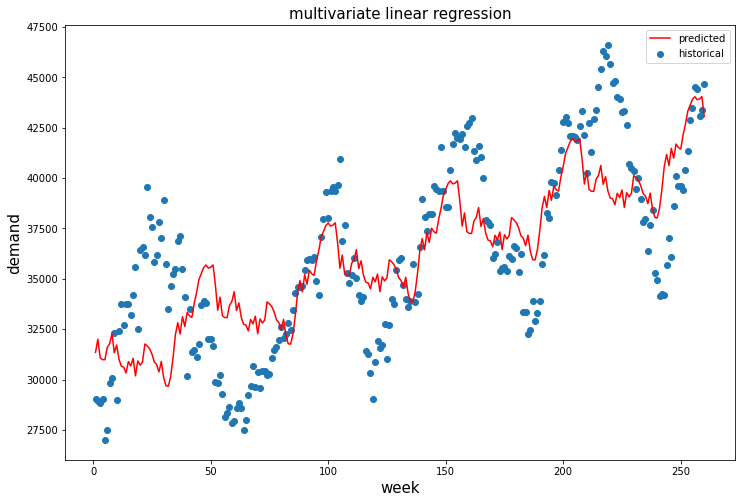

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(data['week'], data['demand'], label = 'historical')
plt.plot(data['week'],fc,label='predicted', color = "red")
plt.xlabel("week",fontsize=15)
plt.ylabel("demand",fontsize=15)
plt.title('multivariate linear regression', fontsize=15)
plt.legend()
plt.show()

In [26]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import bioinfokit.analys
from bioinfokit.analys import stat
from bioinfokit.analys import get_data
from sklearn import linear_model
import stat


X = data[data.columns]
X = sm.add_constant(X) # adding a constant
Y = data['demand']

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(regr.coef_)

[ 0.00000000e+00  1.00000000e+00 -7.00134395e-15]


In [27]:
reg = sm.OLS(Y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.627e+30
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:50:00   Log-Likelihood:                 5912.3
No. Observations:                 260   AIC:                        -1.182e+04
Df Residuals:                     257   BIC:                        -1.181e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.069e-11   1.87e-11      0.572      0.568   -2.61e-11    4.75e-11
demand         1.0000   5.92e-16   1.69e+15      0.000       1.000       1.000
week        5.818e-14   3.64e-14      1.600      0.111   -1.34e-14     1.3e-13
==============================================================================
Omnibus:                       15.519   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.516
Skew:                          -0.483   Prob(JB):                      0.00116
Kurtosis:                       2.438   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# regression metrics
res = bioinfokit.analys.stat()
res.reg_metric(y=np.array(Y), yhat=np.array(reg.predict(X)), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),0.0
1,Mean Squared Error (MSE),0.0
2,Mean Absolute Error (MAE),0.0
3,Mean Absolute Percentage Error (MAPE),0.0


In [29]:
cf = list(regr.coef_)
print(len(cf))

3


In [30]:
def pred(week):
    n = week%52
    for i in range(len(cf)-2):
        return cf[52] + cf[53] * week + cf[n]
fc2 = []
for i in range(1,261):
    fc2.append(pred(i))
print(fc2)

IndexError: list index out of range

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(df['week'], df['demand'], label = 'historical')
plt.plot(df['week'],fc2,label='predicted', color = "red")
plt.show()

KeyError: 'week'

<Figure size 864x576 with 0 Axes>